In [1]:
from google.colab import files
uploaded = files.upload()


Saving model_comparison.csv to model_comparison.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("model_comparison.csv")
df = df[['model', 'rmse', 'mae']].sort_values('rmse')
df.reset_index(drop=True, inplace=True)
df


,model,rmse,mae
0,MovingAverage_window_5,0.051312,0.023516
1,Naive,0.058695,0.023461
2,Tuned_LSTM,138.457896,71.421526
3,Tuned_LSTM,138.595168,72.449048
4,Tuned_LSTM,138.719185,73.157727
5,Tuned_LSTM,138.770286,70.965297
6,Tuned_LSTM,138.818852,69.461044
7,Tuned_LSTM,138.878375,72.320733
8,Tuned_LSTM,138.924854,70.931454
9,LSTM,138.928533,72.575712


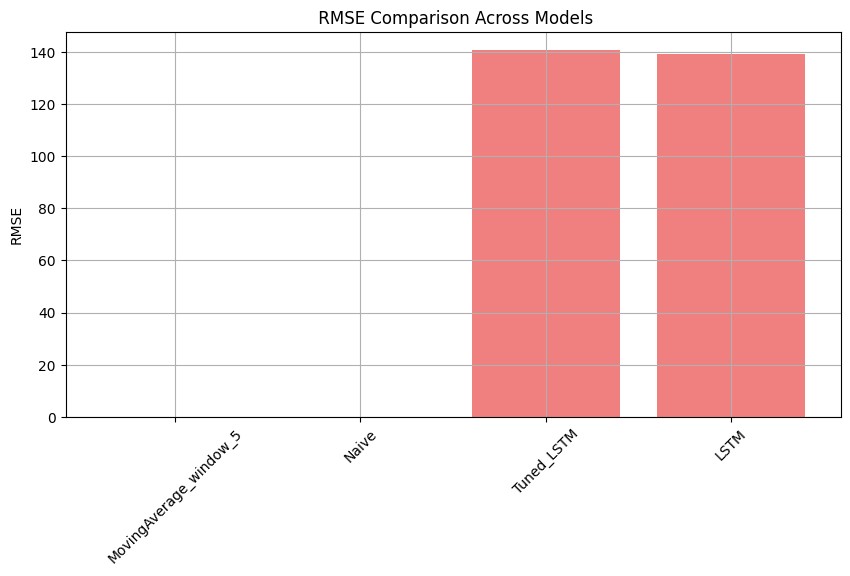

In [5]:
plt.figure(figsize=(10,5))
plt.bar(df['model'], df['rmse'], color='lightcoral')
plt.title(" RMSE Comparison Across Models")
plt.ylabel("RMSE")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()




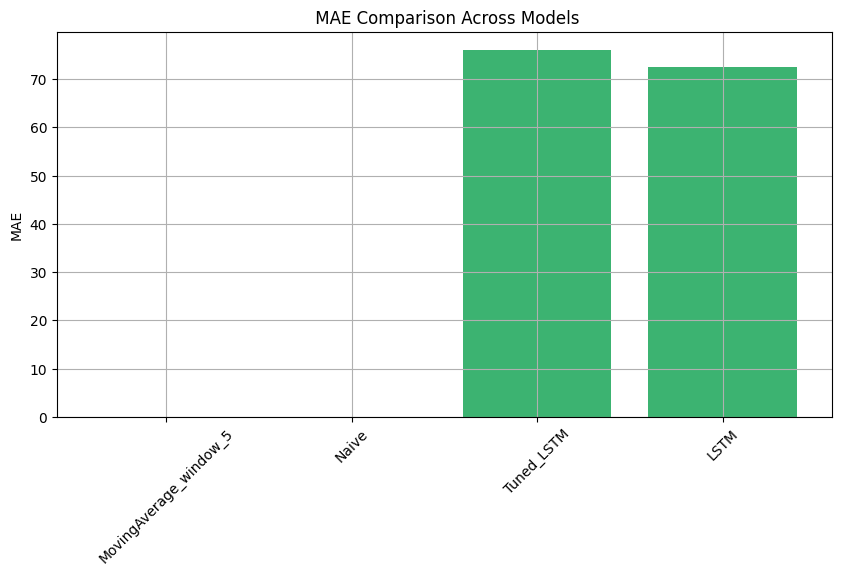

In [6]:
plt.figure(figsize=(10,5))
plt.bar(df['model'], df['mae'], color='mediumseagreen')
plt.title(" MAE Comparison Across Models")
plt.ylabel("MAE")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [8]:
import numpy as np
import pandas as pd

# Simulate 500 rows of cleaned 5G-like performance data
np.random.seed(42)
clustering_data = pd.DataFrame({
    'svr1': np.random.normal(50, 10, 500),
    'svr2': np.random.normal(48, 11, 500),
    'svr3': np.random.normal(52, 9, 500),
    'svr4': np.random.normal(49, 10, 500),
    'upload_bitrate_mbits/sec': np.random.normal(20, 5, 500),
    'download_bitrate_rx_mbits/sec': np.random.normal(100, 20, 500)
})

clustering_data.head()



,svr1,svr2,svr3,svr4,upload_bitrate_mbits/sec,download_bitrate_rx_mbits/sec
0,54.967142,58.187953,64.594199,56.783611,16.624109,111.412260
1,48.617357,69.003583,60.321703,43.488143,19.277407,119.363693
2,56.476885,32.615757,52.536673,40.818011,16.037900,93.373832
3,65.230299,54.192662,46.177569,48.966255,18.460192,87.755265
4,47.658466,40.842932,58.284010,47.298154,10.531927,78.296989


In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

# Select features
features = clustering_data[['svr1', 'svr2', 'svr3', 'svr4',
                            'upload_bitrate_mbits/sec', 'download_bitrate_rx_mbits/sec']]

# Standardize
scaler = StandardScaler()
X = scaler.fit_transform(features)

# Apply KMeans
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)

# Evaluation metrics
silhouette = silhouette_score(X, labels)
davies_bouldin = davies_bouldin_score(X, labels)
calinski = calinski_harabasz_score(X, labels)

print(f"✅ KMeans Clustering Evaluation (k={k})")
print(f"Silhouette Score: {silhouette:.3f}")
print(f"Davies-Bouldin Score: {davies_bouldin:.3f}")
print(f"Calinski-Harabasz Score: {calinski:.2f}")


✅ KMeans Clustering Evaluation (k=3)
Silhouette Score: 0.109
Davies-Bouldin Score: 2.224
Calinski-Harabasz Score: 61.82


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


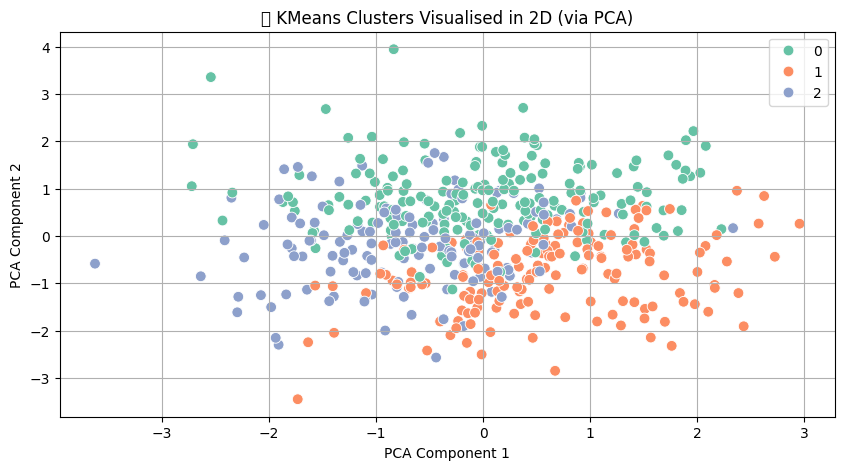

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set2', s=60)
plt.title("📍 KMeans Clusters Visualised in 2D (via PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()
